In [1]:
!pip install tweepy

In [2]:
!pip install textblob

In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
consumerKey='DTxKHBJodRzzk6R4H77Ycq99n'
consumerSecret='Fsi1KuCTPaM4tR32FVt7jajYdF2O4sCJ1pLBbC0MNhdtIcNoKh'
accessToken ='1426417914756825088-zkh6pCBwjffzMRNdzxcsrQhSu4vnZG'
accessTokenSecret='QC6itmMSpUrFbovyiOZVT1IZ3BiNtLUKH5J24kxQCN6YK'

In [7]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [18]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BCCI", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) 134 Tests, 86 ODIs 👍
11,119 international runs 👌

Wishing @VVSLaxman281 - one of the finest to have ever graced the game - a very happy birthday. 🎂 👏

#TeamIndia https://t.co/AkrCVNT0nv

2) Not the result we wanted, but we will look to bounce back in the matches ahead. 

#TeamIndia #T20WorldCup #INDvNZ https://t.co/A61JjoITe1

3) New Zealand win the game, but #TeamIndia will look to make amends in their next match of the #T20WorldCup. #INDvNZ

Scorecard ▶️ https://t.co/ZXELFVZhDp https://t.co/Bvkz3BHshm

4) Match 28. It's all over! New Zealand won by 8 wickets https://t.co/KzmYmA0dFP #INDvNZ #T20WorldCup

5) Match 28. 13.5: H Pandya to K Williamson (30), 4 runs, 107/2 https://t.co/KzmYmzIChf #INDvNZ #T20WorldCup



In [19]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"134 Tests, 86 ODIs 👍\n11,119 international run..."
1,"Not the result we wanted, but we will look to ..."
2,"New Zealand win the game, but #TeamIndia will ..."
3,Match 28. It's all over! New Zealand won by 8 ...
4,"Match 28. 13.5: H Pandya to K Williamson (30),..."


In [20]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"134 Tests, 86 ODIs 👍\n11,119 international run..."
1,"Not the result we wanted, but we will look to ..."
2,"New Zealand win the game, but TeamIndia will l..."
3,Match 28. It's all over! New Zealand won by 8 ...
4,"Match 28. 13.5: H Pandya to K Williamson (30),..."
...,...
95,"Match 16. 13.5: H Rauf to V Kohli (35), 4 runs..."
96,"Match 16. 12.2: WICKET! R Pant (39) is out, c ..."
97,"Match 16. 11.3: H Ali to R Pant (34), 6 runs, ..."
98,"Match 16. 11.2: H Ali to R Pant (28), 6 runs, ..."


In [21]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"134 Tests, 86 ODIs 👍\n11,119 international run...",0.466667,0.200000
1,"Not the result we wanted, but we will look to ...",0.000000,0.000000
2,"New Zealand win the game, but TeamIndia will l...",0.313636,0.134091
3,Match 28. It's all over! New Zealand won by 8 ...,0.454545,0.136364
4,"Match 28. 13.5: H Pandya to K Williamson (30),...",0.000000,0.000000
...,...,...,...
95,"Match 16. 13.5: H Rauf to V Kohli (35), 4 runs...",0.000000,0.000000
96,"Match 16. 12.2: WICKET! R Pant (39) is out, c ...",0.000000,0.000000
97,"Match 16. 11.3: H Ali to R Pant (34), 6 runs, ...",0.000000,0.000000
98,"Match 16. 11.2: H Ali to R Pant (28), 6 runs, ...",0.000000,0.000000


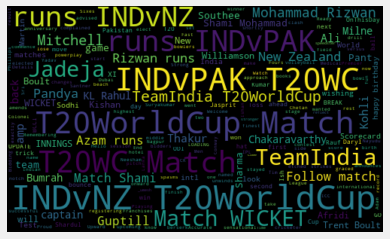

In [22]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"134 Tests, 86 ODIs 👍\n11,119 international run...",0.466667,0.200000,Positive
1,"Not the result we wanted, but we will look to ...",0.000000,0.000000,Neutral
2,"New Zealand win the game, but TeamIndia will l...",0.313636,0.134091,Positive
3,Match 28. It's all over! New Zealand won by 8 ...,0.454545,0.136364,Positive
4,"Match 28. 13.5: H Pandya to K Williamson (30),...",0.000000,0.000000,Neutral
...,...,...,...,...
95,"Match 16. 13.5: H Rauf to V Kohli (35), 4 runs...",0.000000,0.000000,Neutral
96,"Match 16. 12.2: WICKET! R Pant (39) is out, c ...",0.000000,0.000000,Neutral
97,"Match 16. 11.3: H Ali to R Pant (34), 6 runs, ...",0.000000,0.000000,Neutral
98,"Match 16. 11.2: H Ali to R Pant (28), 6 runs, ...",0.000000,0.000000,Neutral


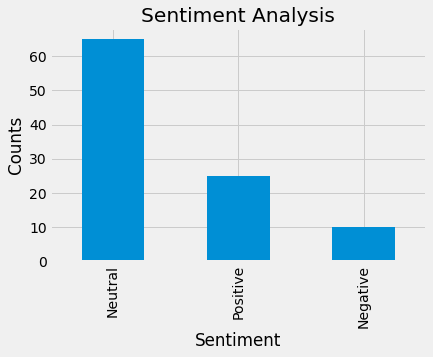

In [24]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

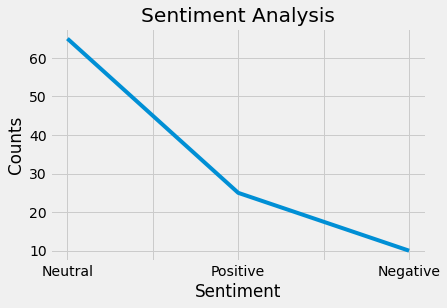

In [25]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()

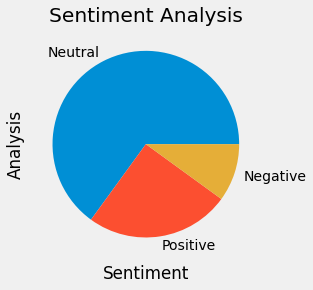

In [26]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()